# Practice Problem 1

# A

In [1]:
import numpy as np

In [2]:
def optcond(x, w, r, beta):
    """
    Function takes choices x (2 dim array, with entries ([h, s]), and parameters w, r, and beta 
    and returns a 2 dim array containing the errors and optamality conditions.
    """
    # read out choices given by x
    h = x[0]
    s = x[1]

    # compute implied consumption
    c1 = h * w - s
    c2 = s * (1 + r)

    # compute errors in the opt conditions 
    # optimality labor choice
    error1 = (1 / (c1 ** 0.5)) * w - h

    # optimality savings choice 
    error2 = -(1 / (c1 ** 0.5)) + beta * (1/ (c2 ** 0.5)) * (1 + r)

    #put the two errors into a vector 
    error = np.array([error1, error2])

    return error
    



In [3]:
# Check whether our optcond function works using sample input 

w = 1
beta = 0.5
r = 0.3 #this seems egregiously high but it is over the course of your working life 

xstart = np.array([1.2, .8])

optcond(xstart, w, r, beta)



array([ 0.38113883, -0.94376139])

We could keep guessing to get optimal conditions, or we can optimize

# B

In [4]:
from scipy.optimize import root

In [10]:
w = 1
beta = 0.5
r = 0.3

sol = root(optcond, xstart, args = (w, r, beta))

xoptimal = sol["x"]

In [11]:
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.796e-13 -8.082e-14]
       x: [ 1.098e+00  2.694e-01]
  method: hybr
    nfev: 14
    fjac: [[-9.291e-01  3.698e-01]
           [-3.698e-01 -9.291e-01]]
       r: [ 1.771e+00 -2.145e+00  2.288e+00]
     qtf: [-6.039e-10  2.657e-11]

In [12]:
def computequantfromsol(x, w, r, beta):
    """
    Takes as input a choice vector x = np.array([h, s]), as well 
    as parameters: w, r, beta
    returns implied consumption values c1, c2, as well as lifetime utility V
    """

    # read out choices given by x
    h = x[0]
    s = x[1]

    # compute implied consumption
    c1 = h * w - s #labor income minus savings 
    c2 = s * (1 + r) #savings with interest 

    # compute lifetime utility
    V = 2 * (c1) ** .5 - .5 * h ** 2 + beta * 2 * c2 ** .5 

    return c1, c2, V

In [14]:
c1optimal, c2optimal, Voptimal = computequantfromsol(xoptimal, w, r, beta)

In [17]:
print("h = ", xoptimal[0])
print("s = ", xoptimal[1])
print("c1 = ", c1optimal)
print("c2 = ", c2optimal)
print("V = ", Voptimal)


h =  1.0983446175137643
s =  0.2694052835411419
c1 =  0.8289393339726224
c2 =  0.3502268686034845
V =  1.8095413482325369


# C


In [18]:
nW = 100

wgrid = np.linspace(1., 10., nW)

In [19]:
print(wgrid)

[ 1.          1.09090909  1.18181818  1.27272727  1.36363636  1.45454545
  1.54545455  1.63636364  1.72727273  1.81818182  1.90909091  2.
  2.09090909  2.18181818  2.27272727  2.36363636  2.45454545  2.54545455
  2.63636364  2.72727273  2.81818182  2.90909091  3.          3.09090909
  3.18181818  3.27272727  3.36363636  3.45454545  3.54545455  3.63636364
  3.72727273  3.81818182  3.90909091  4.          4.09090909  4.18181818
  4.27272727  4.36363636  4.45454545  4.54545455  4.63636364  4.72727273
  4.81818182  4.90909091  5.          5.09090909  5.18181818  5.27272727
  5.36363636  5.45454545  5.54545455  5.63636364  5.72727273  5.81818182
  5.90909091  6.          6.09090909  6.18181818  6.27272727  6.36363636
  6.45454545  6.54545455  6.63636364  6.72727273  6.81818182  6.90909091
  7.          7.09090909  7.18181818  7.27272727  7.36363636  7.45454545
  7.54545455  7.63636364  7.72727273  7.81818182  7.90909091  8.
  8.09090909  8.18181818  8.27272727  8.36363636  8.45454545  8.545

In [30]:
#Prepare empty arrays to show optimal choices for each wage 

hgrid = np.zeros(nW) # hours
sgrid = np.zeros(nW) # Savings 
c1grid = np.zeros(nW) # cons in period 1
c2grid = np.zeros(nW) # cons in period 2
Vgrid = np.zeros(nW) #lifetime value 


In [32]:
for i in range(nW):
    print("i = ", i)

    w = wgrid[i]
    print("w = ", w)
    print("")

    #compute optimal choice for hours and savings as implied by optamality condition
    sol = root(optcond, xstart, args = (w, r, beta))

    xoptimal = sol["x"]

    print("xoptimal =", xoptimal)
    print("success : ", sol["success"])


    #store the results 
    hgrid[i] = xoptimal[0]
    sgrid[i] = xoptimal[1]

    #get the additional quantities we are interested in 
    c1, c2, V = computequantfromsol(xoptimal, w, r, beta)

    #store the additional quantities 
    c1grid[i] = c1
    c2grid[i] = c2
    Vgrid[i] = V

    print("")







i =  0
w =  1.0

xoptimal = [1.09834462 0.26940528]
success :  True

i =  1
w =  1.0909090909090908

xoptimal = [1.13066725 0.30254561]
success :  True

i =  2
w =  1.1818181818181819

xoptimal = [1.16124052 0.33662032]
success :  True

i =  3
w =  1.2727272727272727

xoptimal = [1.19028349 0.37158078]
success :  True

i =  4
w =  1.3636363636363638

xoptimal = [1.21797437 0.40738422]
success :  True

i =  5
w =  1.4545454545454546

xoptimal = [1.24446033 0.44399271]
success :  True

i =  6
w =  1.5454545454545454

xoptimal = [1.26986447 0.48137229]
success :  True

i =  7
w =  1.6363636363636362

xoptimal = [1.29429091 0.5194924 ]
success :  True

i =  8
w =  1.7272727272727273

xoptimal = [1.31782861 0.55832533]
success :  True

i =  9
w =  1.8181818181818183

xoptimal = [1.34055426 0.59784581]
success :  True

i =  10
w =  1.9090909090909092

xoptimal = [1.36253446 0.63803072]
success :  True

i =  11
w =  2.0

xoptimal = [1.3838275  0.67885878]
success :  True

i =  12
w =  2.09090

In [34]:
print(hgrid)
print(sgrid)
print(c1grid)
print(c2grid)
print(Vgrid)

[1.09834462 1.13066725 1.16124052 1.19028349 1.21797437 1.24446033
 1.26986447 1.29429091 1.31782861 1.34055426 1.36253446 1.3838275
 1.40448469 1.42455147 1.4440683  1.46307138 1.48159323 1.49966322
 1.51730794 1.53455155 1.55141611 1.56792177 1.58408705 1.59992897
 1.61546324 1.63070436 1.64566578 1.66036    1.67479864 1.68899253
 1.70295178 1.71668585 1.73020362 1.7435134  1.75662302 1.76953983
 1.78227077 1.79482238 1.80720086 1.81941205 1.83146148 1.84335442
 1.85509585 1.8666905  1.87814288 1.88945726 1.90063774 1.91168821
 1.92261238 1.9334138  1.94409586 1.95466181 1.96511474 1.97545764
 1.98569336 1.99582462 2.00585406 2.01578419 2.02561744 2.03535614
 2.04500252 2.05455874 2.06402689 2.07340896 2.08270688 2.09192252
 2.10105767 2.11011406 2.11909338 2.12799724 2.1368272  2.14558479
 2.15427146 2.16288864 2.1714377  2.17991996 2.18833672 2.19668924
 2.20497871 2.21320632 2.2213732  2.22948048 2.23752921 2.24552046
 2.25345522 2.2613345  2.26915925 2.2769304  2.28464887 2.29231

# D

In [35]:
import matplotlib.pyplot as plt

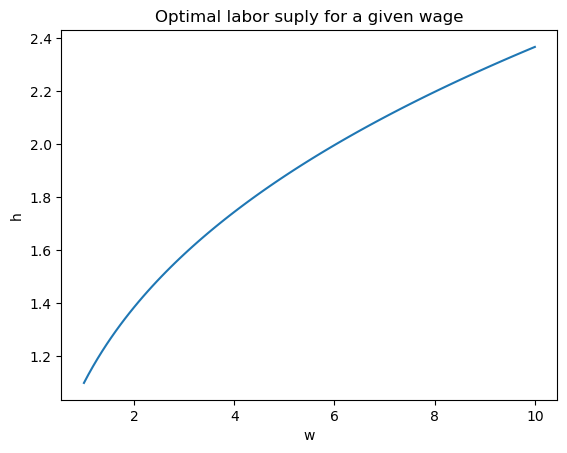

In [40]:
plt.plot(wgrid, hgrid)
plt.xlabel("w")
plt.ylabel("h")
plt.title("Optimal labor suply for a given wage")
plt.show()

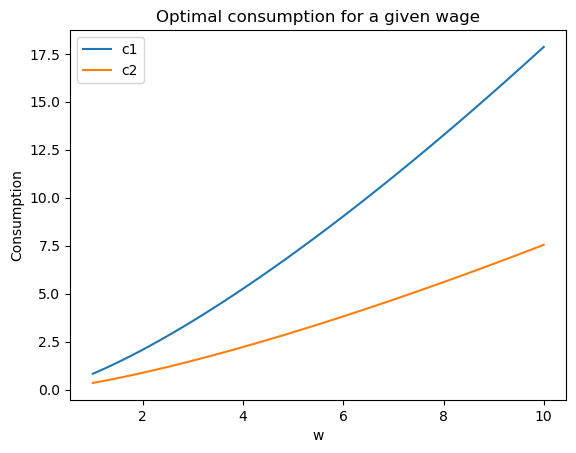

In [42]:
plt.plot(wgrid, c1grid, label = "c1")
plt.plot(wgrid, c2grid, label = "c2")
plt.xlabel("w")
plt.ylabel("Consumption")
plt.title("Optimal consumption for a given wage")
plt.legend()
plt.show()